# Creche Car Parking

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="white")

In [17]:
# read in data
df = pd.read_csv("D:\Data Analysis\Practicum\DCU car parking data\Final_Data\creche_parking_data_final.csv",index_col=0,header='infer')

In [18]:
df.head()

,Date,Hour,Month,Day,Holiday,Weekday,WorkingDay,Total Parking Spaces,No of parking spaces left,Free Spaces %,Occupancy
Instant,,,,,,,,,,,
1,1-Feb-17,0,2,Wednesday,0,3,1,235,219,93,7
2,1-Feb-17,1,2,Wednesday,0,3,1,235,219,93,7
3,1-Feb-17,2,2,Wednesday,0,3,1,235,219,93,7
4,1-Feb-17,3,2,Wednesday,0,3,1,235,219,93,7
5,1-Feb-17,4,2,Wednesday,0,3,1,235,219,93,7


In [19]:
df.tail()

,Date,Hour,Month,Day,Holiday,Weekday,WorkingDay,Total Parking Spaces,No of parking spaces left,Free Spaces %,Occupancy
Instant,,,,,,,,,,,
2826,29-May-17,19,5,Monday,0,1,1,235,198,84,16
2827,29-May-17,20,5,Monday,0,1,1,235,229,97,3
2828,29-May-17,21,5,Monday,0,1,1,235,229,97,3
2829,29-May-17,22,5,Monday,0,1,1,235,229,97,3
2830,29-May-17,23,5,Monday,0,1,1,235,229,97,3


## Exploratory Data Analysis
### The Target Variable:  Occupancy(% of Free Car Parking Space)

Lets first look at the target variable.

In [20]:
df['Occupancy'].describe()

count    2830.000000
mean       40.829682
std        39.066610
min         0.000000
25%         6.000000
50%        19.000000
75%        87.000000
max       100.000000
Name: Occupancy, dtype: float64

In [21]:
np.median(df.Occupancy)

19.0

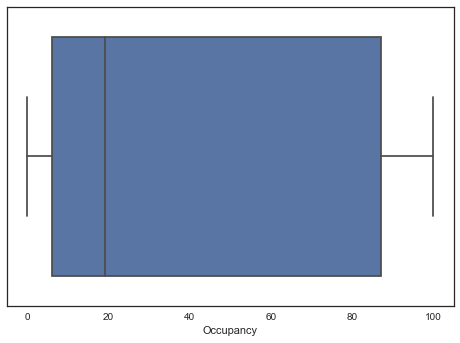

In [22]:
sns.boxplot(df.Occupancy)

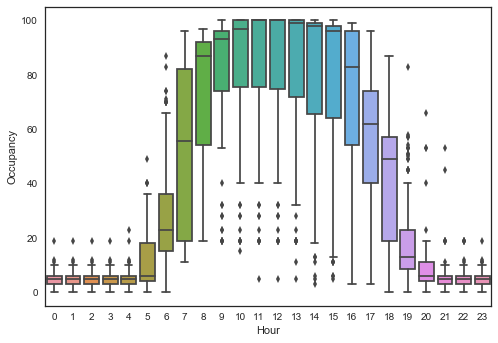

In [23]:
sns.boxplot(x=df.Hour, y=df.Occupancy)
plt.show()

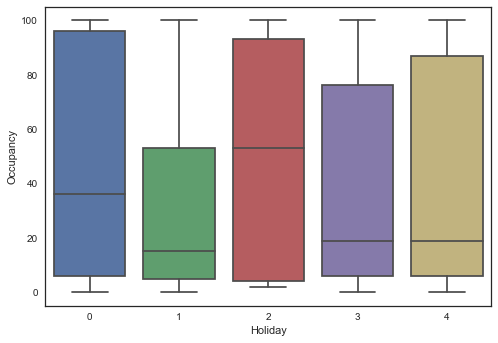

In [24]:
sns.boxplot(x=df.Holiday, y=df.Occupancy)
plt.show()

## Modifying DataSet for Co-rrelation Matrix

-Remove Unneeded Features

-One-hot Encoding of Nominal Features We use Pandas method .get_dummies to create dummy features of the nominal variables. First, we need to check if the categorial data are indeed of dtype category

In [25]:
# make a copy of original dataframe
df_orig = df.copy()

In [26]:
df = df.drop(['Date','Month','Day','Weekday','WorkingDay','Total Parking Spaces','No of parking spaces left','Free Spaces  %'],axis=1)

## check dtype of data



In [27]:

for x in df.columns:
    print df[x].dtype

int64
int64
int64


In [28]:
# transform categorial columns to categories
for x in ['Holiday']:
    df[x] = df[x].astype('category')

In [29]:
# check if transformation succeeded
for x in df.columns:
    print df[x].dtype

int64
category
int64


In [30]:
# make another copy
df_with_categories = df.copy()

In [31]:
# transform categorial variables into dummy variables
df = pd.get_dummies(df)

In [32]:
df.head()

,Hour,Occupancy,Holiday_0,Holiday_1,Holiday_2,Holiday_3,Holiday_4
Instant,,,,,,,
1,0,7,1,0,0,0,0
2,1,7,1,0,0,0,0
3,2,7,1,0,0,0,0
4,3,7,1,0,0,0,0
5,4,7,1,0,0,0,0


In [156]:
df.to_csv("D:\Data Analysis\Practicum\DCU car parking data\Final_Data\creche_parking_data_New_columns.csv")

### Check for Correlation in Numerical Features

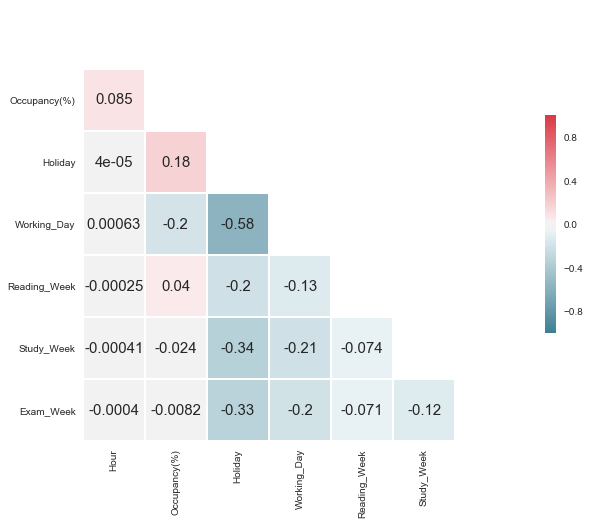

In [32]:
df=pd.read_csv("D:\Data Analysis\Practicum\DCU car parking data\Final_Data\creche_parking_data_correlation_occupancy.csv")

feature_namesx= ['Hour','Occupancy(%)','Holiday','Working_Day','Reading_Week','Study_Week']

feature_namesy= ['Occupancy(%)','Holiday','Working_Day','Reading_Week','Study_Week','Exam_Week']

corrmat = df.corr()
corrmat
# Generate a mask for the upper triangle
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10,8))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10,as_cmap=True)
ax=sns.heatmap(corrmat, annot=True, annot_kws={'size':15}, xticklabels=feature_namesx, yticklabels=feature_namesy,fmt=".2g",cmap=cmap,
           linewidths=1,cbar=True,mask=mask,center=0,square=True,ax=ax,cbar_kws={"shrink": .5})


plt.show()